In [1]:
mydir.D52 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_Sert/summary_stats/"
res.Sert.D52 = read.csv(paste0(mydir.D52,"pool1_17_D52.Sert.qtl_results_all.txt"),sep="\t")

In [2]:
mydir.D52ROT = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_Sert/summary_stats/"
res.Sert.D52ROT = read.csv(paste0(mydir.D52ROT,"pool1_17_D52.Sert.qtl_results_all.txt"),sep="\t")

In [3]:
head(res.Sert.D52ROT)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000164346,5_74064340_A_G,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74064340,G,1,0.1331169,1
ENSG00000164346,5_74065821_A_G,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74065821,G,1,0.1331169,1
ENSG00000164346,5_74067536_G_C,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74067536,C,1,0.1331169,1
ENSG00000164346,5_74068774_C_T,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74068774,T,1,0.1331169,1
ENSG00000164346,5_74069311_A_T,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74069311,T,1,0.1331169,1
ENSG00000164346,5_74070053_T_A,8.528324e-27,0.9590362,0.08949262,-1,5,74062817,74072737,154,154,5,74070053,A,1,0.1331169,1


In [4]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv")
head(leads,2)

X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [5]:
genes = as.character(leads[leads$label == "Sert_D52","feature_id"])
genes0 = as.character(leads[leads$label == "Sert_D52_ROT","feature_id"])
# genes
ROT_genes = genes0[!(genes0 %in% genes)]
length(ROT_genes)

[1] 249

In [6]:
library(ggplot2)

In [7]:
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
# head(annos,2)

In [8]:
# library(ggplot2)

In [9]:
gene_name = 'ACSF3'
# gene_name = 'SQSTM1'

In [10]:
annos[annos$hgnc_symbol == gene_name,]
gene = as.character(annos[annos$hgnc_symbol == gene_name,"ensembl_gene_id"])

,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
9195,ENSG00000176715_ACSF3,16,89154783,89222254,ACSF3,ENSG00000176715_ACSF3,ENSG00000176715


In [21]:
gene_start = annos[annos$hgnc_symbol == gene_name,"start"]
gene_end = annos[annos$hgnc_symbol == gene_name,"end"]

In [22]:
leads[leads$feature_id == gene,]

,X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
9504,109631,16_89049973_A_G,9.629261e-08,-0.3082059,0.05778588,0.0020635629,16,89154783,89222254,175,...,16,89049973,G,1,0.4314286,0.2169278,ENSG00000176715,0.031150466,0.01832831,DA_D52
13910,97051,16_89234676_A_G,3.028844e-11,0.5328033,0.08017913,0.0003454116,16,89154783,89222254,154,...,16,89234676,G,1,0.2370130,0.8261733,ENSG00000176715,0.007495492,0.00433907,Sert_D52_ROT


In [23]:
r1 = res.Sert.D52[res.Sert.D52$feature_id == gene,]
r2 = res.Sert.D52ROT[res.Sert.D52ROT$feature_id == gene,]

In [24]:
library(ggthemes)

In [25]:
mypalette = "Warm and cool"

In [26]:
col_D52 = canva_pal(mypalette)(4)[1]
col_D52_ROT = canva_pal(mypalette)(4)[2]

In [27]:
options(repr.plot.width = 6, repr.plot.height = 3.2)

In [28]:
m1 = min(r1$p_value)
m2 = min(r2$p_value)
m = min(m1,m2)

In [29]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"

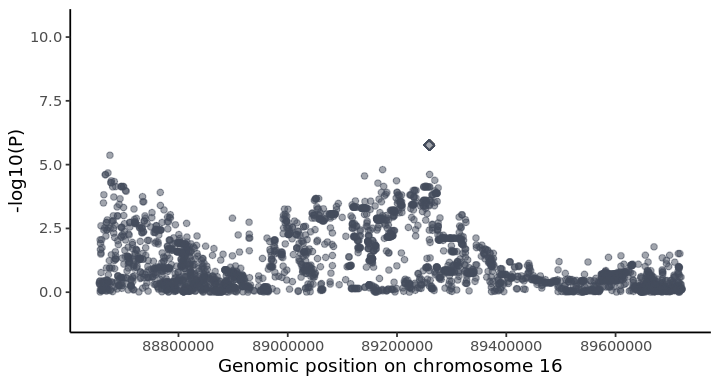

In [30]:
pos1 = r1[r1$p_value == m1,"snp_position"][1]
p1 = ggplot(r1, aes(x = snp_position, y = -log10(p_value))) + geom_point(alpha = 0.5,col=col_D52) + 
    geom_point(aes(x=pos1, y = -log10(m1)),col=col_D52, size = 2, shape = 23, alpha = 1) + 
#     ggtitle(gene_name) + 
    ylim(c(-1,-log10(m))) + theme_classic() + 
    xlab("Genomic position on chromosome 16") + ylab("-log10(P)")
p1

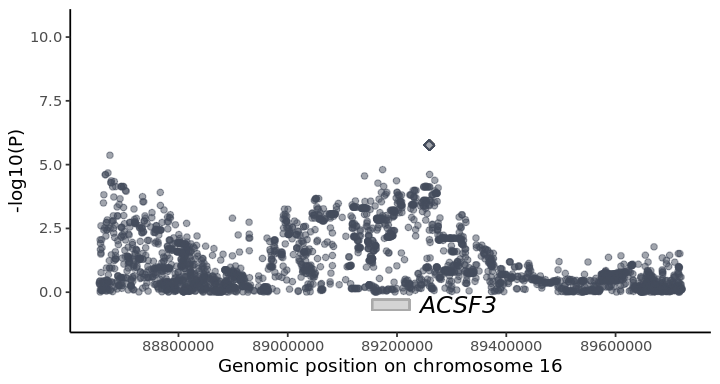

In [31]:
p = p1 
p <- p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "darkgray", alpha = 0.2, fill = "lightgrey")
p <- p + annotate("text", x = gene_end + 0.9*10e+4, y = -0.5, label = "ACSF3", col = "black", size = 5, fontface = 'italic')
p1 = p
p1

In [32]:
pdf(paste0(fig_dir,"Fig4b_ACSF3_D52.pdf"), width=6, height=3.5)
p1
dev.off()

png 
  2

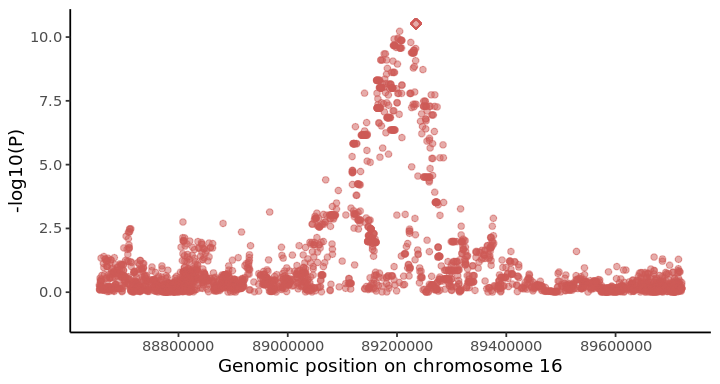

In [36]:
pos2 = r2[r2$p_value == m2,"snp_position"][1]
p2 = ggplot(r2, aes(x = snp_position, y = -log10(p_value))) + geom_point(alpha = 0.5,col=col_D52_ROT) + 
    geom_point(aes(x=pos2, y = -log10(m2)),col=col_D52_ROT, size = 2, shape = 23, alpha = 1) + 
#     ggtitle(gene_name) + 
    ylim(c(-1,-log10(m))) + theme_classic()+ 
    xlab("Genomic position on chromosome 16") + ylab("-log10(P)")
p2

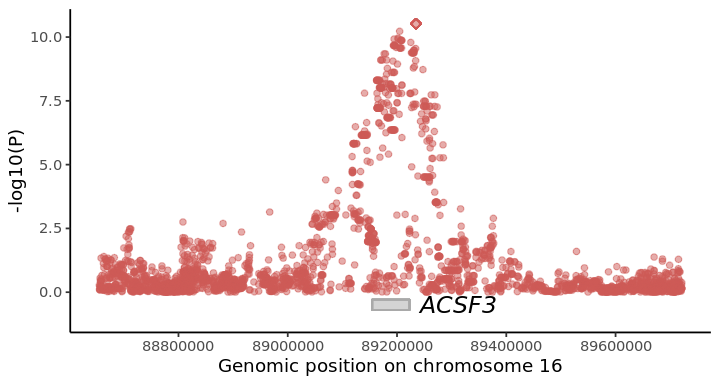

In [37]:
p = p2 
p <- p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "darkgray", alpha = 0.2, fill = "lightgrey")
p <- p + annotate("text", x = gene_end + 0.9*10e+4, y = -0.5, label = "ACSF3", col = "black", size = 5, fontface = 'italic')
p2 = p
p2

In [38]:
pdf(paste0(fig_dir,"Fig4b_ACSF3_D52_ROT.pdf"), width=6, height=3.5)
p2
dev.off()

png 
  2